## Capital Bike Share Demand (Regression)

### Import data

In [1]:
import pandas as pd
data = pd.read_csv('train.csv')
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


#### Description of variables
- datetime - hourly date + timestamp 
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [2]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## Exploratory Data Analysis

### Which factors contribute most to the number of bicycles being checked out over the course of a given day?

In [3]:
# Convert datetime to datetime format
data['datetime']= pd.to_datetime(data['datetime'])
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
data.count()

datetime      10886
season        10886
holiday       10886
workingday    10886
weather       10886
temp          10886
atemp         10886
humidity      10886
windspeed     10886
casual        10886
registered    10886
count         10886
dtype: int64

### How much of an impact does weather have on demand?

 - Weather has a negative and week correlation (-0.13) on demand, i.e. if weather is bad (e.g. 4) than the demand goes down
 - in contrast temp, atempand humidity have higher impact than weather

<AxesSubplot:xlabel='weather', ylabel='count'>

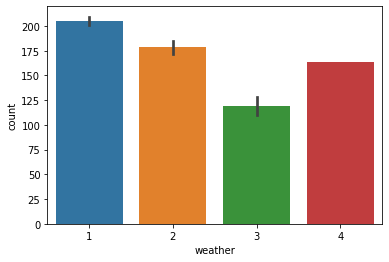

In [5]:
import seaborn as sns
sns.barplot(x= 'weather', y= 'count', data = data)

## Datetime conversion

In [6]:
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.weekday
data['hour'] = data['datetime'].dt.hour
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,2,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,2,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,2,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,2,22


<AxesSubplot:xlabel='year', ylabel='count'>

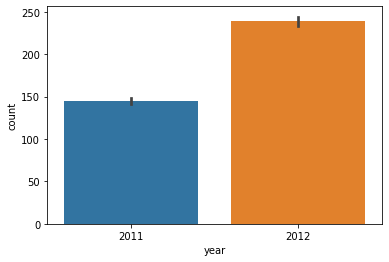

In [7]:
sns.barplot(x= 'year', y= 'count', data = data)

<AxesSubplot:xlabel='month', ylabel='count'>

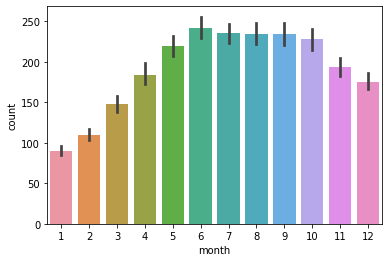

In [8]:
sns.barplot(x= 'month', y= 'count', data = data)

<AxesSubplot:xlabel='day', ylabel='count'>

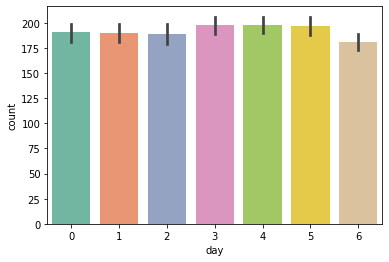

In [9]:
sns.barplot(x= 'day', y= 'count', data = data, palette= 'Set2')

<AxesSubplot:xlabel='hour', ylabel='count'>

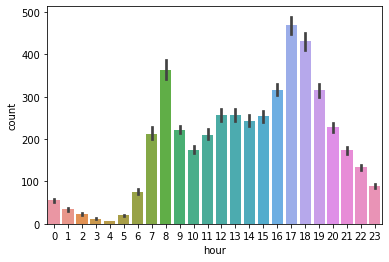

In [10]:
sns.barplot(x= 'hour', y= 'count', data = data)

## How does the behavior of casual users differ from subscribers?

In [11]:
month = data.groupby(['month'])['registered','casual'].sum()
month

/tmp/ipykernel_17601/76028659.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  month = data.groupby(['month'])['registered','casual'].sum()


,registered,casual
month,,
1,72632,7252
2,89816,9297
3,108445,25056
4,127589,39813
5,158862,41285
6,172159,48574
7,163670,50947
8,167646,45870
9,166628,45901


In [12]:
month.reset_index(inplace=True)
month

,month,registered,casual
0,1,72632,7252
1,2,89816,9297
2,3,108445,25056
3,4,127589,39813
4,5,158862,41285
5,6,172159,48574
6,7,163670,50947
7,8,167646,45870
8,9,166628,45901
9,10,169347,38087


<AxesSubplot:xlabel='month', ylabel='registered'>

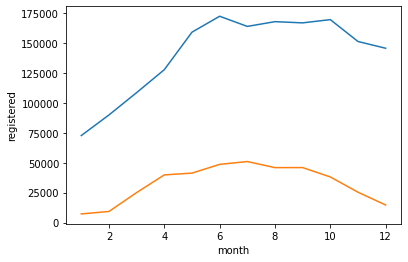

In [13]:
sns.lineplot(data=month, y='registered', x = 'month')
sns.lineplot(data=month, y='casual', x = 'month')

<BarContainer object of 12 artists>

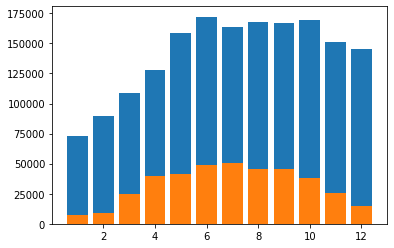

In [14]:
import matplotlib.pyplot as plt

y = month['registered']
x = month['month']
w = month['casual']


plt.bar(x,y, align='center')
plt.bar(x,w, align='center')



/tmp/ipykernel_17601/3396795679.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  day = data.groupby(['day'])['registered','casual'].sum()


<AxesSubplot:xlabel='day', ylabel='registered'>

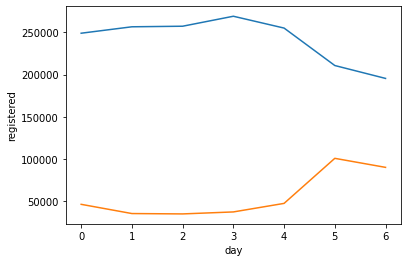

In [15]:
day = data.groupby(['day'])['registered','casual'].sum()
day.reset_index(inplace=True)

sns.lineplot(data=day, y='registered', x = 'day')
sns.lineplot(data=day, y='casual', x = 'day')

In [16]:
data.drop(labels='datetime', axis=1, inplace=True)

### PP Score

https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598

#### works only with older version of scikit-learn

In [17]:
#import ppscore as pps

#fig, ax = plt.subplots(figsize=(10,10))  
#a = pps.matrix(data).pivot(columns='x', index='y', values='ppscore')
#sns.heatmap(a, annot=True, ax=ax, cmap='coolwarm')

### Heatmap

<AxesSubplot:>

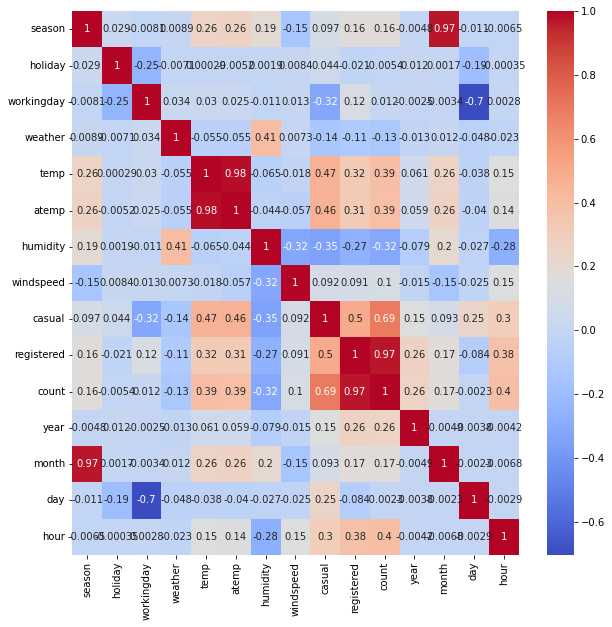

In [18]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(data.corr(), annot= True, ax=ax, cmap= 'coolwarm')

#### --> Order of correlation, starting with highest: registered, casual,temp and atemp, humidity, season, weather, workingday, windspeed, holiday


In [19]:
from IPython.display import display, Markdown, Latex

## Checking for multicollinearity with Variance Inflation Factor

#### VIF measures the linear association between an independent variable and all other independent variables.
#### A VIF for any given independent variable is calculated by:
    


##                               $VIF = \frac{1}{1-R²}$

#### https://towardsdatascience.com/everything-you-need-to-know-about-multicollinearity-2f21f082d6dc

In [20]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

### VIF above 10 indicates high multicollinearity

In [21]:

data= data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]
X_variables = data[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'windspeed', 
                    'year','month', 'day', 'hour']]

vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) 
                   for i in range(len(X_variables.columns))]
vif_data

,feature,VIF
0,season,109.474112
1,holiday,1.565106
2,workingday,9.064293
3,weather,7.508942
4,temp,276.719498
5,atemp,315.197703
6,humidity,17.493027
7,windspeed,4.161167
8,year,67.055738
9,month,83.524540


In [22]:
#removed season, year and atemp

data= data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]
X_variables = data[[ 'holiday', 'workingday','temp', 'windspeed', 'humidity',
                   'month', 'day', 'hour', 'weather']]

vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) 
                   for i in range(len(X_variables.columns))]
vif_data

,feature,VIF
0,holiday,1.293959
1,workingday,5.460216
2,temp,7.728628
3,windspeed,3.464645
4,humidity,12.879300
5,month,5.203902
6,day,5.321123
7,hour,3.925416
8,weather,7.469605


### Plots of y and X variables

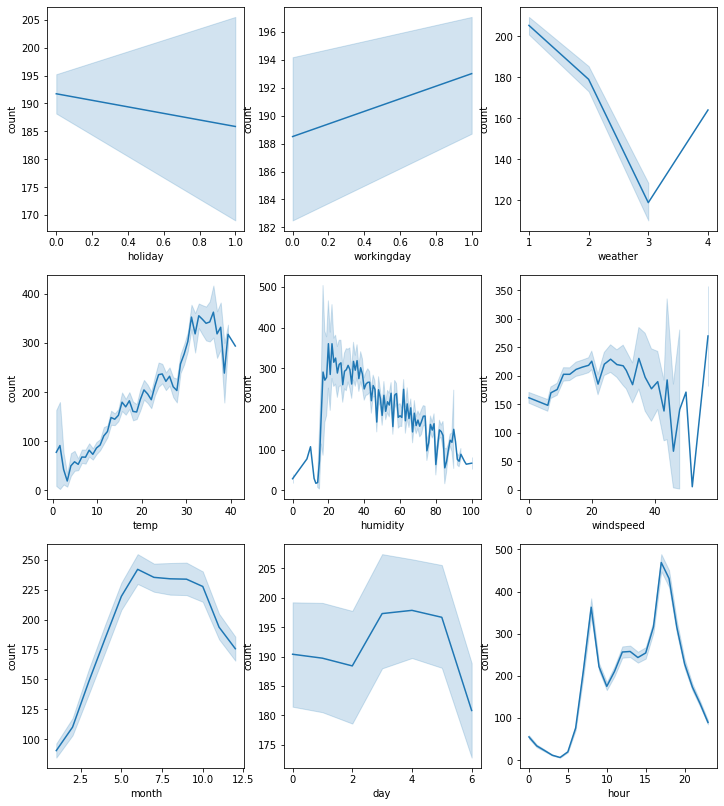

In [23]:
f, axes = plt.subplots(3, 3, figsize=(12, 14), sharex=False)
a = sns.lineplot(data=data, x="holiday", y="count", ax=axes[0, 0])
b = sns.lineplot(data=data, x="workingday", y="count", ax=axes[0, 1])
c = sns.lineplot(data=data, x="weather", y="count", ax=axes[0, 2])
d = sns.lineplot(data=data, x="temp", y="count", ax=axes[1, 0])
e = sns.lineplot(data=data, x="humidity", y="count", ax=axes[1, 1])
g = sns.lineplot(data=data, x="windspeed", y="count", ax=axes[1, 2])
h = sns.lineplot(data=data, x="month", y="count", ax=axes[2, 0])
i = sns.lineplot(data=data, x="day", y="count", ax=axes[2, 1])
j = sns.lineplot(data=data, x="hour", y="count", ax=axes[2, 2])

## Train test split

In [24]:
y = data['count']
y.shape

(10886,)

In [25]:
X = data[['holiday', 'workingday', 'weather', 'temp','humidity', 'windspeed', 'day', 'hour', 'month', 'season']]
X.shape

(10886, 10)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8708, 10), (2178, 10), (8708,), (2178,))

In [27]:
X_train.head()

,holiday,workingday,weather,temp,humidity,windspeed,day,hour,month,season
2815,0,1,1,27.88,83,6.0032,2,5,7,3
8695,0,0,1,36.90,39,19.9995,5,16,8,3
8406,0,1,1,32.80,41,16.9979,2,15,7,3
1543,0,0,2,14.76,93,7.0015,6,4,4,2
4952,0,0,1,13.12,45,16.9979,5,10,11,4


In [28]:
X_test.head()

,holiday,workingday,weather,temp,humidity,windspeed,day,hour,month,season
3133,0,1,1,33.62,59,0.0000,1,11,7,3
5786,1,0,1,4.10,54,6.0032,0,6,1,1
5224,0,0,1,9.84,48,12.9980,6,18,12,4
8953,0,1,2,29.52,62,12.9980,2,10,8,3
8054,0,1,1,25.42,53,16.9979,4,23,6,2


## Feature Engineering

### Preprocessor for windspeed and humidity

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly2_transformer = PolynomialFeatures(degree= 2, include_bias= False)

### Preprocessor for month, hour and weather

In [30]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [31]:
scaler = MinMaxScaler()

### Preprocessor for temp and humidity

In [32]:
from sklearn.pipeline import make_pipeline
action = make_pipeline(PolynomialFeatures(degree= 3, include_bias= False), PolynomialFeatures(interaction_only=True, include_bias= False))

In [33]:
from sklearn.preprocessing import KBinsDiscretizer
bin_transformer = KBinsDiscretizer(n_bins= 7, encode = 'onehot-dense', strategy = 'quantile')

### ColumnTransformer

In [39]:
from sklearn.compose import ColumnTransformer

feature_transform = ColumnTransformer([
    ('do_nothing', 'passthrough', ['workingday', 'day']),
    #('poly2', poly2_transformer, [ 'windspeed', 'humidity']),
    ('inter', action, ['windspeed', 'humidity', 'temp']),
    #('temp', bin_transformer, ['temp']),
    #('scaler', scaler, ['weather']),
    ('encoder', encoder, ['month', 'hour','weather']),
    #('hours', hours_transformer, ['hour']),
    #('drop_features','drop',['day', 'hour']),

])


In [40]:
X_train_trans = feature_transform.fit_transform(X_train)
X_train_trans

array([[ 1.    ,  2.    ,  6.0032, ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  5.    , 19.9995, ...,  0.    ,  0.    ,  0.    ],
       [ 1.    ,  2.    , 16.9979, ...,  0.    ,  0.    ,  0.    ],
       ...,
       [ 0.    ,  6.    , 16.9979, ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  5.    , 35.0008, ...,  0.    ,  0.    ,  0.    ],
       [ 1.    ,  2.    , 12.998 , ...,  1.    ,  0.    ,  0.    ]])

## Fit Linear Regression

In [41]:
import numpy as np
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [42]:
from sklearn.linear_model import LinearRegression
m = LinearRegression()

#ylog_train = np.log1p(y_train)
m.fit(X_train_trans, y_train_log)

LinearRegression()

In [43]:
round(m.score(X_train_trans, y_train_log),3)

0.82

In [44]:
X_test_trans = feature_transform.transform(X_test)

In [45]:
round(m.score(X_test_trans, y_test_log),3)

0.81

In [46]:
y_pred = m.predict(X_test_trans)

In [47]:
y_pred2 = np.exp(y_pred)-1

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

In [49]:
print(f'R^2: {round(r2_score(y_test, y_pred2),2)}')

R^2: 0.65


In [50]:
print(f'MSE: {round(mean_squared_error(y_test, y_pred2),2)}')

MSE: 11415.76


In [51]:
print(f'MAE: {round(mean_absolute_error(y_test, y_pred2),2)}')

MAE: 69.13


In [52]:
print(f'RMSLE: {round(mean_squared_log_error(y_test, y_pred2),2)}')

RMSLE: 0.39


## OLS output

In [53]:
import statsmodels.api as sm
from scipy import stats
import numpy as np

In [54]:
#X_train_trans.shape, y_train.shape

In [55]:
mod = sm.OLS(y_train_log, X_train_trans)

In [56]:
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     331.0
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:17:10   Log-Likelihood:                -7921.7
No. Observations:                8708   AIC:                         1.608e+04
Df Residuals:                    8589   BIC:                         1.692e+04
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0096      0.020     -0.478      0.6

In [57]:
#X_train_trans

## Poisson regression

In [58]:
P = data[['holiday', 'workingday', 'weather', 'temp','humidity', 'windspeed','month', 'day', 'hour']]
P.shape

(10886, 9)

In [59]:
from sklearn.model_selection import train_test_split

P_train, P_test, y_train, y_test = train_test_split(P,y, test_size = 0.2, random_state = 42)
P_train.shape, P_test.shape, y_train.shape, y_test.shape

((8708, 9), (2178, 9), (8708,), (2178,))

In [60]:
P_train.head()

,holiday,workingday,weather,temp,humidity,windspeed,month,day,hour
2815,0,1,1,27.88,83,6.0032,7,2,5
8695,0,0,1,36.90,39,19.9995,8,5,16
8406,0,1,1,32.80,41,16.9979,7,2,15
1543,0,0,2,14.76,93,7.0015,4,6,4
4952,0,0,1,13.12,45,16.9979,11,5,10


In [61]:
P_test.head()

,holiday,workingday,weather,temp,humidity,windspeed,month,day,hour
3133,0,1,1,33.62,59,0.0000,7,1,11
5786,1,0,1,4.10,54,6.0032,1,0,6
5224,0,0,1,9.84,48,12.9980,12,6,18
8953,0,1,2,29.52,62,12.9980,8,2,10
8054,0,1,1,25.42,53,16.9979,6,4,23


In [62]:
P_train_trans = feature_transform.fit_transform(P_train)
P_train_trans

array([[ 1.    ,  2.    ,  6.0032, ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  5.    , 19.9995, ...,  0.    ,  0.    ,  0.    ],
       [ 1.    ,  2.    , 16.9979, ...,  0.    ,  0.    ,  0.    ],
       ...,
       [ 0.    ,  6.    , 16.9979, ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  5.    , 35.0008, ...,  0.    ,  0.    ,  0.    ],
       [ 1.    ,  2.    , 12.998 , ...,  1.    ,  0.    ,  0.    ]])

In [63]:
P_test_trans = feature_transform.transform(P_test)

In [64]:
from sklearn.linear_model import PoissonRegressor

mp = PoissonRegressor(alpha=0.000001)
mp.fit(P_train_trans, y_train)


/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/_loss/glm_distribution.py:323: 

PoissonRegressor(alpha=1e-06)

In [65]:
y_train.min()

1

In [66]:
p_pred = mp.predict(P_test_trans)
p_pred

array([191.58474966, 191.58474966, 191.58474966, ..., 191.58474966,
       191.58474966, 191.58474966])

In [67]:
mp.score(P_train_trans, y_train)

0.0

In [68]:
from sklearn.metrics import mean_poisson_deviance #Mean Poisson deviance regression loss
print (f'Mean Poisson deviance regression loss: {round(mean_poisson_deviance(y_test, p_pred),2)}')

Mean Poisson deviance regression loss: 166.35


In [69]:
print(f'RMSE: {round(mean_squared_error(y_test, p_pred),2)}') 

RMSE: 33006.94


In [70]:
print(f'MSE: {round(mean_squared_error(y_test, p_pred),2)}')

MSE: 33006.94


In [71]:
print(f'MAE: {round(mean_absolute_error(y_test, p_pred),2)}')

MAE: 142.7


In [72]:
print(f'RMSLE: {round(mean_squared_log_error(y_test, p_pred),2)}')

RMSLE: 2.52


## Lasso regression

In [73]:
from sklearn.linear_model import Lasso

In [74]:
m_lasso = Lasso(alpha = 1)
m_lasso.fit(X_train_trans,y_train)
ypred_lasso = m_lasso.predict(X_test_trans)
ypred_lasso2 = np.exp(y_pred)-1
ypred_lasso2

/home/eva/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.748e+07, tolerance: 2.853e+04
  model = cd_fast.enet_coordinate_descent(


array([184.54384789,  25.25360695, 309.06984786, ..., 262.23412984,
        10.21297791, 186.79648884])

In [75]:
m_lasso.coef_ 

array([ 0.00000000e+00,  0.00000000e+00, -1.64827417e+00,  2.12271402e+00,
        7.36696473e+00, -1.39199274e-01, -7.81920566e-03,  2.00996829e-01,
       -2.60769063e-02, -4.97082184e-03,  3.05207199e-01, -1.02019248e-04,
        1.28427980e-04, -3.77874108e-03, -5.51205967e-04, -3.52358030e-03,
        2.28720660e-03,  7.18150824e-05, -1.33098129e-03, -1.81614425e-03,
        5.91055702e-04,  1.28246396e-01, -1.46252373e-01,  4.29511035e-04,
        1.27699057e-03, -5.84978442e-04, -3.60241742e-05, -8.10860097e-04,
        3.80839689e-03,  4.59269356e-05, -2.75653160e-05,  5.20268154e-06,
       -5.88044971e-06,  1.70076323e-06, -8.02840971e-05,  1.02918573e-05,
       -4.22971586e-05,  9.36966629e-06, -3.20951612e-05,  8.85768046e-02,
        1.03447134e-03, -4.54484212e-04, -1.16208437e-03,  1.34279994e-04,
       -7.00166825e-04, -3.29519802e-04,  4.28145910e-05, -7.71032641e-06,
        5.03394115e-05,  5.01338350e-06, -3.49040882e-05,  2.36218653e-05,
        1.07793152e-06,  

In [76]:
round(m_lasso.score(X_train_trans, y_train),3)

0.636

In [77]:
round(m_lasso.score(X_test_trans, y_test),3)

0.631

In [78]:
print(f'R^2: {round(r2_score(y_test, ypred_lasso2),2)}')

R^2: 0.65


In [79]:
print(f'MSE: {round(mean_squared_error(y_test, ypred_lasso),2)}')

MSE: 12178.58


In [80]:
print(f'MAE: {round(mean_absolute_error(y_test, ypred_lasso),2)}')

MAE: 78.57


In [ ]:
#X_train_trans = pd.DataFrame(X_train_trans, columns= feature_transform.get_feature_names_out())
#X_train_trans

In [ ]:
#X_train_trans.columns

In [ ]:
#pd.DataFrame({'features': X_train_trans.columns, 'weights': m_lasso.coef_})

# Random Forest

In [82]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 100,random_state = 42) 
rf_log = RandomForestRegressor(n_estimators= 100,random_state = 42) 
rf.fit(X_train_trans,y_train)

rf_log.fit(X_train_trans, y_train_log)

y_pred_rf = rf.predict(X_test_trans)
y_pred_rf_1 = rf_log.predict(X_test_trans)

#print(f'R^2: {round(r2_score(y_test, y_predrf),2)}')
#print(f'MSE: {round(mean_squared_error(y_test, y_predrf),2)}')
#print(f'RMSE: {round(mean_squared_log_error(y_test, y_pred),2)}') ##log before??

In [83]:
round(rf.score(X_train_trans, y_train),2)

0.97

In [84]:
round(rf.score(X_test_trans, y_test),2)

0.82

In [85]:
round(rf_log.score(X_train_trans, y_train_log),2)

0.99

In [86]:
round(rf_log.score(X_test_trans, y_test_log),2)

0.91

In [87]:
y_pred_rf_2 = np.exp(y_pred_rf_1)-1

In [88]:
print(f'MAE: {round(mean_absolute_error(y_test,y_pred_rf),2)}')

MAE: 51.46


In [89]:
print(f'MAE: {round(mean_absolute_error(y_test,y_pred_rf_2),2)}')

MAE: 46.73


In [90]:
print(f'RMSLE: {round(mean_squared_log_error(y_test, y_pred_rf),2)}')

RMSLE: 0.32


In [91]:
print(f'RMSLE: {round(mean_squared_log_error(y_test, y_pred_rf_2),2)}')

RMSLE: 0.18


In [92]:
print(f'R^2: {round(r2_score(y_test, y_pred_rf_2),2)}')

R^2: 0.84


In [93]:
from sklearn.model_selection import cross_val_score
#For the forest
cross_val_score(rf, X_train_trans, y_train)

array([0.79353086, 0.80254738, 0.81833709, 0.81420414, 0.79560928])

### RMSLE is particularly helpful when you want to penalize an under-predicted estimate greater than an over-predicted estimate.

### Example RMSLE = 0.5

### $e^{0.5}$ = 1.648

### -actual count : 30
### -predicted count : $30 \cdot 1.648$ = 49.4

### Example RMSLE = 0.3

### $e^{0.5}$ = 1.34

### -actual count : 30 
### -predicted count : $30 \cdot 1.348$ = 40.4

### -actual count : 50
### -predicted count : $50 \cdot 1.348$ = 67.4